In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid') 
from pylab import rcParams  
import plotly.graph_objs as go
import cufflinks
from statsmodels.tsa.stattools import adfuller

In [2]:
df= pd.read_csv('electricity - monthly data.csv')
df.head(5)

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:NRG_CB_EM(1.0),28/09/22 23:00:00,M,AIM,E7000,GWH,AL,2018-01,588.340,NaN
1,ESTAT:NRG_CB_EM(1.0),28/09/22 23:00:00,M,AIM,E7000,GWH,AL,2018-02,542.046,NaN
2,ESTAT:NRG_CB_EM(1.0),28/09/22 23:00:00,M,AIM,E7000,GWH,AL,2018-03,564.343,NaN
3,ESTAT:NRG_CB_EM(1.0),28/09/22 23:00:00,M,AIM,E7000,GWH,AL,2018-04,465.565,NaN
4,ESTAT:NRG_CB_EM(1.0),28/09/22 23:00:00,M,AIM,E7000,GWH,AL,2018-05,476.886,NaN


In [3]:
df['nrg_bal'].unique()

array(['AIM', 'DL', 'EXP', 'EXP_TO_EU', 'IMP', 'IMP_FROM_EU',
       'TI_EHG_EPS'], dtype=object)

In [4]:
df = df[df['geo'] == 'EL']
df = df[df['nrg_bal'] == 'IMP']
df.reset_index(inplace=True)
df.drop(['DATAFLOW','index','nrg_bal','siec','geo','unit', 'LAST UPDATE', 'freq', 'OBS_FLAG'], inplace=True, axis=1)
df.rename(columns = {'TIME_PERIOD':'time'}, inplace = True)
df['time'].replace(regex=True,inplace=True, to_replace='M',value='')
df['time'] =  pd.to_datetime(df['time'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df.rename(columns = {'OBS_VALUE':'value'}, inplace = True)
df

,time,value
0,2008-01-01,130.000
1,2008-02-01,215.000
2,2008-03-01,419.000
3,2008-04-01,327.000
4,2008-05-01,242.000
...,...,...
170,2022-03-01,491.477
171,2022-04-01,925.979
172,2022-05-01,834.676
173,2022-06-01,509.147


In [5]:
df[df['time'] == '2008-01-01']

,time,value
0,2008-01-01,130.0


Text(0.5, 1.0, 'Consumption through time')

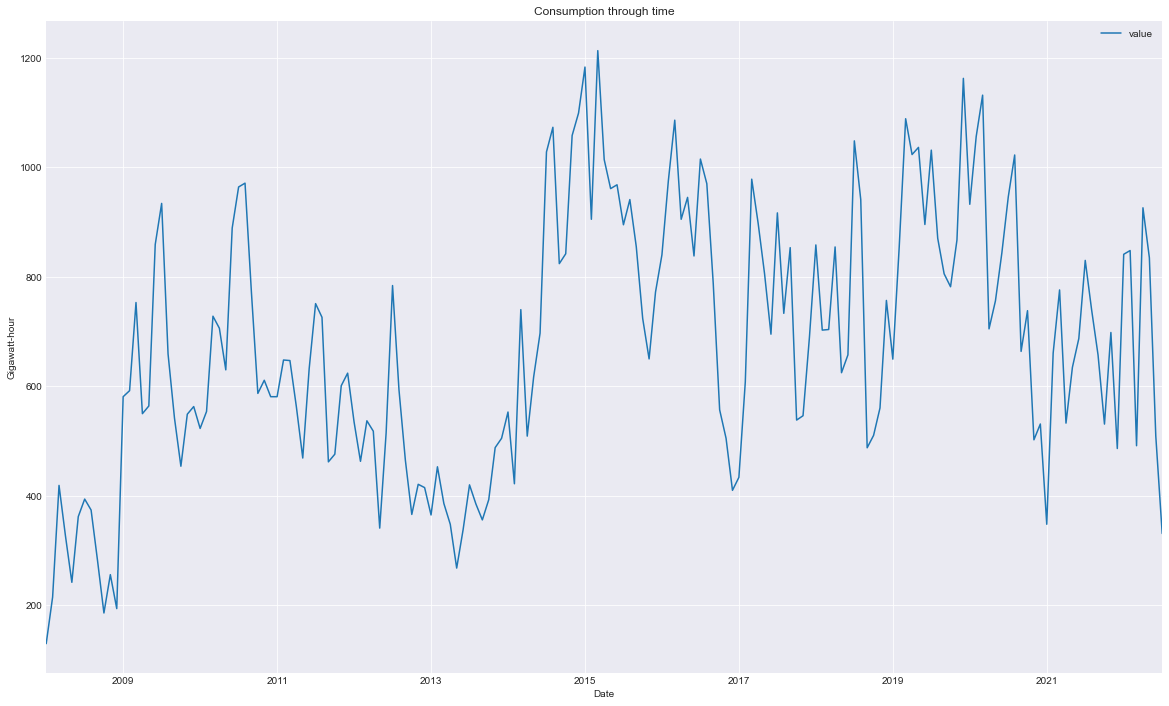

In [6]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'time', y = 'value')
plt.xlabel('Date')
plt.ylabel('Gigawatt-hour')
plt.title("Consumption through time")